In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline

In [3]:
import bayesianchangepoint as bcp



## performing inference: application to experimental data


get https://github.com/chloepasturel/AnticipatorySPEM


In [4]:

seed = 42
np.random.seed(seed)

N_blocks = 3
seed = 51 #119 #2017
N_trials = 200
tau = N_trials/5.
(trials, p) = bcp.switching_binomial_motion(N_trials=N_trials, N_blocks=N_blocks, tau=tau, seed=seed)


In [5]:
p.shape

(200, 3, 3)

In [6]:
i_block = 0
print('occurrences=', p[:, i_block, 0])
print('p=', p[:, i_block, 1])
print('switches=', p[:, i_block, -1])

occurrences= [0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 1.]
p= [0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352 0.64752352
 0.64752352 0.64752352 0.64752352 0.647

In [7]:
p0, r0 = .5, 1.
print('p0, r0 = ', p0, r0)
#N_trials = a.exp['N_trials']
h = 1./tau # a.exp['tau']
print('this experiment uses', N_trials, 'trials and a switch rate of h=', h, '(that is, one switch every', 1/h, 'trials on average)')

p0, r0 =  0.5 1.0
this experiment uses 200 trials and a switch rate of h= 0.025 (that is, one switch every 40.0 trials on average)


i_block= 0


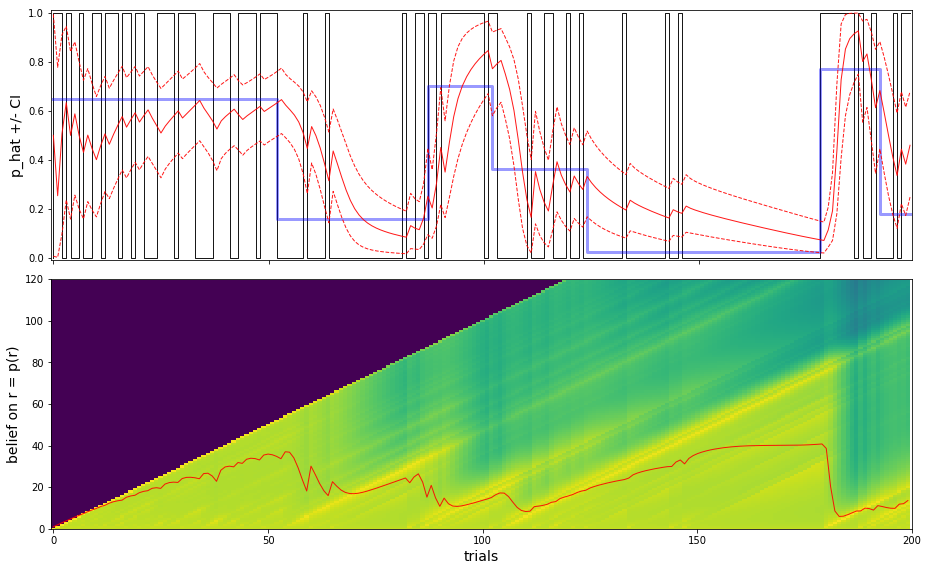

i_block= 1


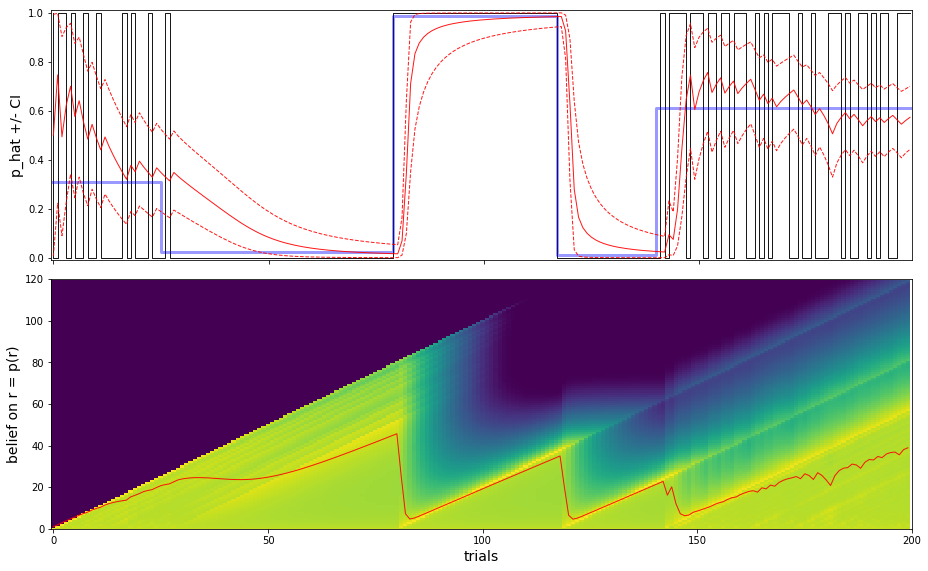

i_block= 2


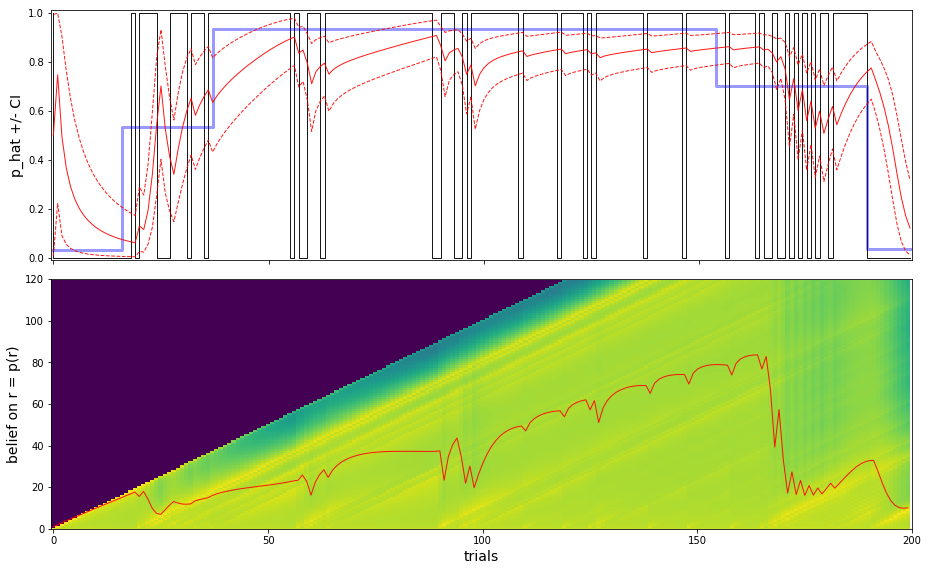

In [8]:
for i_block in range(3):
    print('i_block=', i_block)
    o = p[:, i_block, 0]
    p_bar, r, beliefs = bcp.inference(o, h=h, p0=p0)
    fig, axs = bcp.plot_inference(p[:, i_block, 0], p[:, i_block, 1], p_bar, r, beliefs, eps=1e-18, p0=p0)
    plt.show()

In [9]:
import bayesianchangepoint as bcp

seed = 51 #119 #2017 # 42
np.random.seed(seed)
N_blocks = 3 
N_trials = 500
max_run_length = 350
Jeffreys = False
Jeffreys = True
tau = N_trials/10.
h = 1./tau
(trials, p) = bcp.switching_binomial_motion(N_trials=N_trials, N_blocks=N_blocks, tau=tau, seed=seed, Jeffreys=Jeffreys)


p0, r0 = .5, 2. - Jeffreys
print('p0, r0 = ', p0, r0)

p0, r0 =  0.5 1.0


p0, r0 =  0.5 0.5


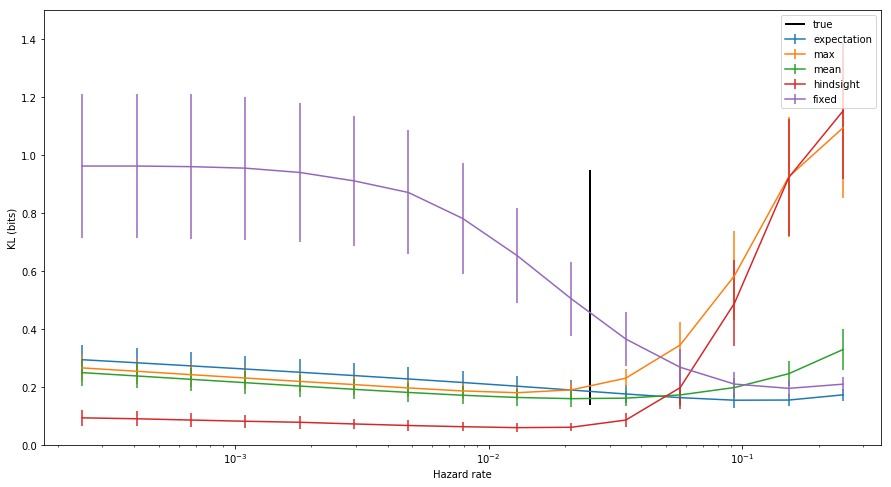

p0, r0 =  0.5 1


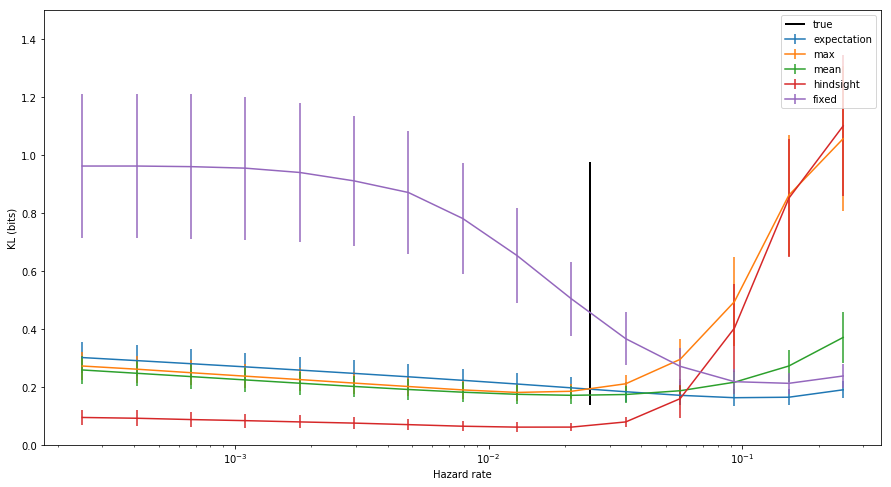

p0, r0 =  0.5 1.5


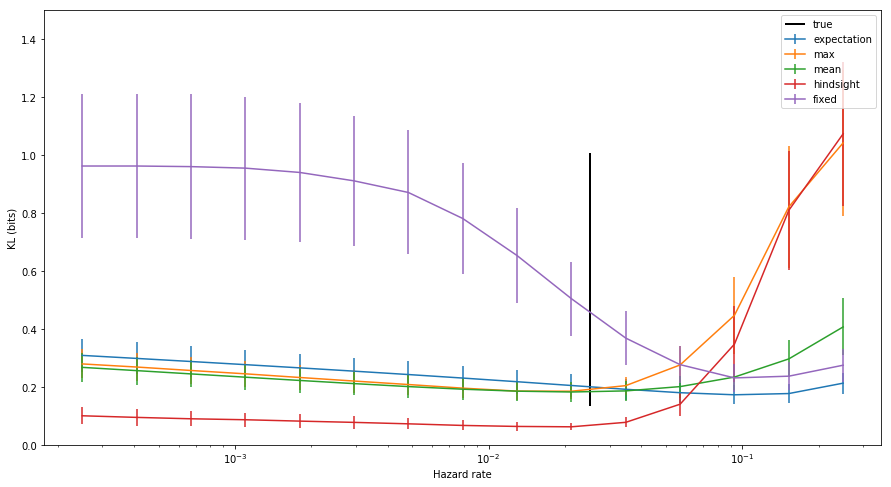

p0, r0 =  0.5 2


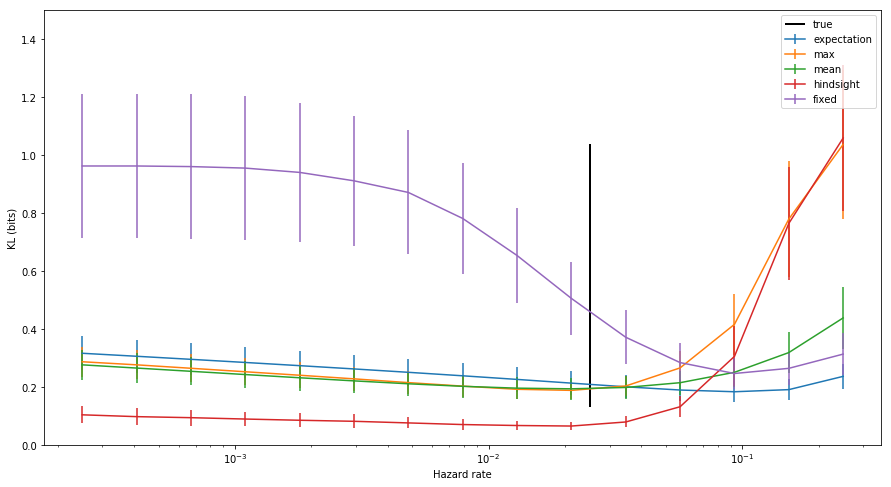

p0, r0 =  0.5 2.5


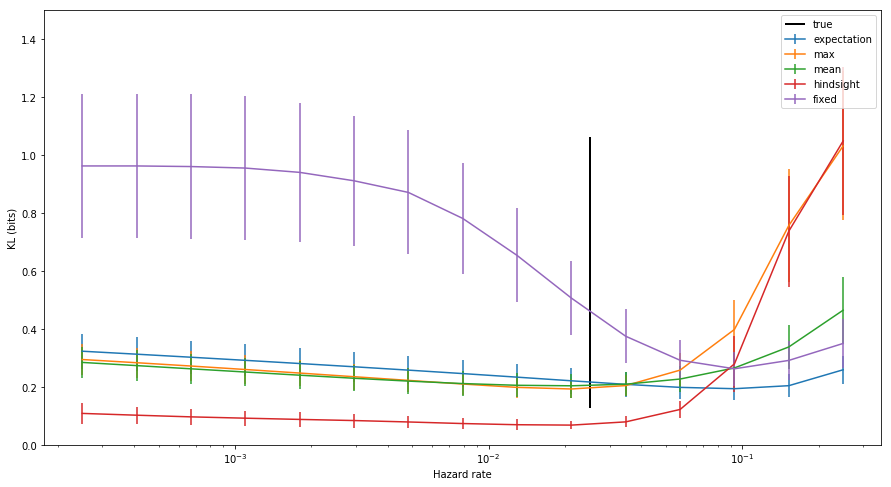

In [10]:
for r0 in [0.5, 1, 1.5, 2, 2.5]:
    print('p0, r0 = ', p0, r0)
    N_scan = 15 # number of h values we test

    N_blocks = 100 # number of blocks we use in our evaluation
    #N_blocks = 20 # number of blocks we use in our evaluation
    
    N_trials = 2000
    #N_trials = 200
    tau = 40 #N_trials/5.
    h = 1./tau

    border = 2*tau # N_trials//10

    (trials, p) = bcp.switching_binomial_motion(N_trials=N_trials, N_blocks=N_blocks, tau=tau, seed=seed, Jeffreys=Jeffreys)

    hs = h*np.logspace(-2, 1, N_scan)
    modes = ['expectation', 'max', 'mean', 'hindsight', 'fixed']
    score = np.zeros((len(modes), N_scan, N_blocks))
    KL = np.zeros((len(modes), N_scan, N_blocks))
    for i_block in range(N_blocks):
        o = p[:, i_block, 0] # observations
        for i_scan, h_ in enumerate(hs):
            p_bar, r, beliefs = bcp.inference(o, h=h_, p0=p0, r0=r0)
            for i_mode, mode_ in enumerate(modes):
                if mode_=='fixed': 
                    p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode=mode_, fixed_window_size=int(1/h_))
                else:
                    p_hat, r_hat = bcp.readout(p_bar, r, beliefs, mode=mode_, p0=p0)
                KL_ = p_hat * np.log2(p_hat) - p_hat * np.log2(p[:, i_block, 1])
                KL_ += (1-p_hat) * np.log2(1-p_hat) - (1-p_hat) * np.log2(1-p[:, i_block, 1])
                KL[i_mode, i_scan, i_block] = np.mean(KL_)
                score[i_mode, i_scan, i_block] = np.mean(np.log2(bcp.likelihood(o[(border+1):], p_hat[border:-1], r_hat[border:-1])))
                #score[i_mode, i_scan, i_block] = np.log2(np.mean(bcp.likelihood(o[(border+1):], p_hat[border:-1], r_hat[border:-1])))

    if False:
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))
        for i_mode, mode in enumerate(modes):
            ax.errorbar(hs, np.nanmean(score[i_mode, ...], axis=1), yerr=np.std(score[i_mode, ...], axis=1), label=mode)

        ax.vlines(h, ymin=np.nanmin(np.nanmean(score, axis=(0))), ymax=np.nanmax(np.nanmean(score, axis=(0))), lw=2, label='true')
        ax.set_xscale("log")#, nonposx='clip')

        ax.set_xlabel('Hazard rate')
        #ax.set_ylabel('Mean log-likelihood (bits)')
        ax.set_ylabel('Log of mean likelihood (bits)')
        ax.legend();
    
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    for i_mode, mode in enumerate(modes):
        ax.errorbar(hs, np.nanmean(KL[i_mode, ...], axis=1), yerr=np.std(KL[i_mode, ...], axis=1), label=mode)

    ax.vlines(h, ymin=np.nanmin(np.nanmean(KL, axis=(0))), ymax=np.nanmax(np.nanmean(KL, axis=(0))), lw=2, label='true')
    ax.set_xscale("log")#, nonposx='clip')

    ax.set_xlabel('Hazard rate')
    #ax.set_ylabel('Mean log-likelihood (bits)')
    ax.set_ylim(0, 1.5)
    
    ax.set_ylabel('KL (bits)')
    ax.legend();
    plt.show()